In [1]:
# packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.stattools import adfuller

In [2]:
# loading the data
data = pd.read_csv('challenge_data.csv',header=0,index_col=0)

In [3]:
# checking the data
data

,BDEP,TPO,HL,BHT,RPM,TOR,DEPT,WOB
1.607131e+12,5063.135,19.548731,522.503986,18.982,0.0,0.0,5795.817,13.38
1.607131e+12,5063.135,15.586150,523.159986,19.068,0.0,0.0,5795.817,12.73
1.607131e+12,5062.959,18.492043,524.441986,19.164,0.0,0.0,5795.817,11.45
1.607131e+12,5062.959,16.114494,525.053986,19.249,0.0,0.0,5795.817,10.84
1.607131e+12,5062.778,17.699526,526.081986,19.347,0.0,0.0,5795.817,9.81
...,...,...,...,...,...,...,...,...
1.607151e+12,3055.453,0.000000,358.541991,24.768,0.0,0.0,5795.817,2.46
1.607151e+12,3055.453,0.000000,358.595991,24.856,0.0,0.0,5795.817,2.40
1.607151e+12,3055.453,0.000000,358.605991,24.940,0.0,0.0,5795.817,2.39
1.607151e+12,3055.281,0.000000,358.411991,25.038,0.0,0.0,5795.817,2.59


In [4]:
# looking for missing values
data.isna().sum()

BDEP     0
TPO     13
HL       2
BHT     15
RPM     26
TOR     17
DEPT    22
WOB     22
dtype: int64

In [5]:
# checking the number of unique values
data.nunique()

BDEP    11913
TPO       181
HL      28966
BHT     17766
RPM         1
TOR         1
DEPT        1
WOB     11811
dtype: int64

In [6]:
# duplicate values
data.duplicated().sum()

403

In [7]:
# loading the annotation data
annot = pd.read_csv('challenge_annotation.csv',header=0,index_col=0)

In [8]:
annot

,Annotation
1.607131e+12,off_slips
1.607131e+12,on_slips
1.607131e+12,off_slips
1.607131e+12,on_slips
1.607131e+12,off_slips
...,...
1.607150e+12,off_slips
1.607151e+12,on_slips
1.607151e+12,off_slips
1.607151e+12,on_slips


In [9]:
# putting togheter the two datasets 
new_df = pd.merge_asof(data,annot,left_index=True,right_index=True)

In [10]:
new_df

,BDEP,TPO,HL,BHT,RPM,TOR,DEPT,WOB,Annotation
1.607131e+12,5063.135,19.548731,522.503986,18.982,0.0,0.0,5795.817,13.38,NaN
1.607131e+12,5063.135,15.586150,523.159986,19.068,0.0,0.0,5795.817,12.73,NaN
1.607131e+12,5062.959,18.492043,524.441986,19.164,0.0,0.0,5795.817,11.45,NaN
1.607131e+12,5062.959,16.114494,525.053986,19.249,0.0,0.0,5795.817,10.84,NaN
1.607131e+12,5062.778,17.699526,526.081986,19.347,0.0,0.0,5795.817,9.81,NaN
...,...,...,...,...,...,...,...,...,...
1.607151e+12,3055.453,0.000000,358.541991,24.768,0.0,0.0,5795.817,2.46,off_slips
1.607151e+12,3055.453,0.000000,358.595991,24.856,0.0,0.0,5795.817,2.40,off_slips
1.607151e+12,3055.453,0.000000,358.605991,24.940,0.0,0.0,5795.817,2.39,off_slips
1.607151e+12,3055.281,0.000000,358.411991,25.038,0.0,0.0,5795.817,2.59,off_slips


In [11]:
# looking for missing values
new_df.isna().sum()

BDEP            0
TPO            13
HL              2
BHT            15
RPM            26
TOR            17
DEPT           22
WOB            22
Annotation    284
dtype: int64

After the join the Annotation column has 284 missing values.
This happened because the join was made by the nearest keys (Timestamps ms).
I will have to drop this values.

In [12]:
# checking the number of unique values
new_df.nunique()

BDEP          11913
TPO             181
HL            28966
BHT           17766
RPM               1
TOR               1
DEPT              1
WOB           11811
Annotation        2
dtype: int64

In [13]:
new_df.duplicated().sum()

403

In [14]:
# describing the data
new_df.describe()

,BDEP,TPO,HL,BHT,RPM,TOR,DEPT,WOB
count,40673.000000,40660.000000,40671.000000,40658.000000,40647.0,40656.0,4.065100e+04,40651.000000
mean,4128.110895,6.970594,322.494967,20.995525,0.0,0.0,5.795817e+03,109.278085
std,566.009203,35.477067,157.447630,13.364818,0.0,0.0,1.537974e-09,155.015235
min,3055.281000,0.000000,80.455998,1.694000,0.0,0.0,5.795817e+03,-10.760000
25%,3636.986000,0.000000,97.413997,7.635000,0.0,0.0,5.795817e+03,1.760000
50%,4179.829000,0.000000,394.129990,22.199000,0.0,0.0,5.795817e+03,6.600000
75%,4610.241000,0.000000,445.305988,33.103250,0.0,0.0,5.795817e+03,293.090000
max,5063.135000,204.469157,528.517986,39.987000,0.0,0.0,5.795817e+03,451.030000


the RPM and TOR columns appear to have only 0. TPO looks like to be the same.

In [15]:
# checking if the RPM and TPO have only 0.
(new_df==0).sum(axis=0)

BDEP              0
TPO           38748
HL                0
BHT               0
RPM           40647
TOR           40656
DEPT              0
WOB              25
Annotation        0
dtype: int64

In [16]:
# converting to datetime
new_df.index = pd.to_datetime(new_df.index, unit='ms')

In [17]:
# creating a date column
new_df['time'] = new_df.index

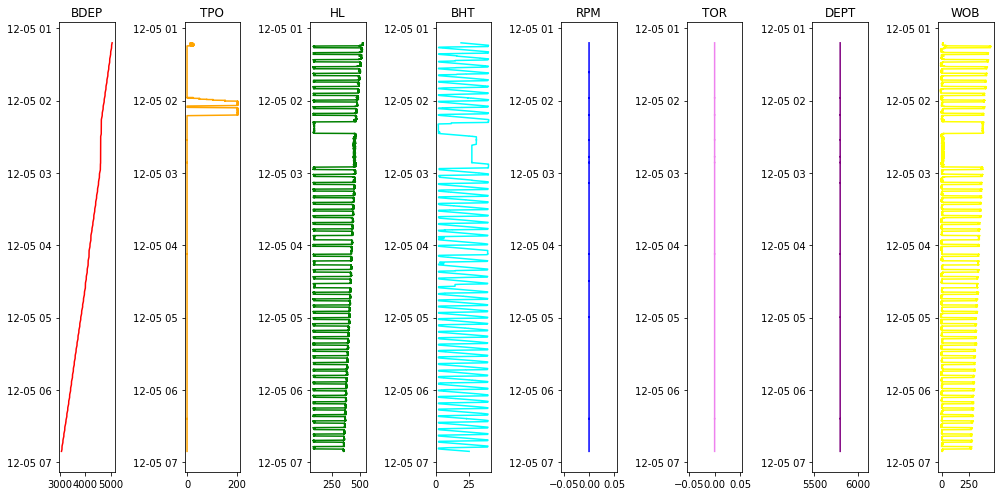

In [18]:
# plot of the data
logs = new_df.columns[:8]
colors = ['red', 'orange', 'green', 'cyan', 'blue', 'violet', 'purple','yellow']

plt.figure(figsize=(14,7))
for i in range(len(logs)):
    plt.subplot(1,8,i+1)
    plt.plot(new_df[logs[i]], new_df.time, color=colors[i])
    plt.title(logs[i])
    plt.gca().invert_yaxis()

plt.tight_layout()

Between hour 2 and 3 something happened that stop the drill.
Almost 30 minutes the slips were off. Also in the period a connection operation took almost 10 minutes to happen.

In [19]:
# the data looks like stationary.
X = new_df.HL.values

X = X[~np.isnan(X)]

In [20]:
# apply adfuller test to see if the data is stationary or not
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.104186
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


the data is stationary.

In [21]:
new_df

,BDEP,TPO,HL,BHT,RPM,TOR,DEPT,WOB,Annotation,time
2020-12-05 01:12:00.313999872,5063.135,19.548731,522.503986,18.982,0.0,0.0,5795.817,13.38,NaN,2020-12-05 01:12:00.313999872
2020-12-05 01:12:00.822000128,5063.135,15.586150,523.159986,19.068,0.0,0.0,5795.817,12.73,NaN,2020-12-05 01:12:00.822000128
2020-12-05 01:12:01.328999936,5062.959,18.492043,524.441986,19.164,0.0,0.0,5795.817,11.45,NaN,2020-12-05 01:12:01.328999936
2020-12-05 01:12:01.838000128,5062.959,16.114494,525.053986,19.249,0.0,0.0,5795.817,10.84,NaN,2020-12-05 01:12:01.838000128
2020-12-05 01:12:02.345999872,5062.778,17.699526,526.081986,19.347,0.0,0.0,5795.817,9.81,NaN,2020-12-05 01:12:02.345999872
...,...,...,...,...,...,...,...,...,...,...
2020-12-05 06:50:57.604000000,3055.453,0.000000,358.541991,24.768,0.0,0.0,5795.817,2.46,off_slips,2020-12-05 06:50:57.604000000
2020-12-05 06:50:58.112000000,3055.453,0.000000,358.595991,24.856,0.0,0.0,5795.817,2.40,off_slips,2020-12-05 06:50:58.112000000
2020-12-05 06:50:58.620000000,3055.453,0.000000,358.605991,24.940,0.0,0.0,5795.817,2.39,off_slips,2020-12-05 06:50:58.620000000
2020-12-05 06:50:59.128000000,3055.281,0.000000,358.411991,25.038,0.0,0.0,5795.817,2.59,off_slips,2020-12-05 06:50:59.128000000


I want to see the slip to slip connection time. Aggregating the total time when it was on and when it was off. 
Thus, I will create a timediff variable that is the difference in seconds from each row.
Then group by Annotation to take the total time.

In [22]:
# creating the timediff
new_df['timediff'] = new_df['time'].diff()

In [23]:
# to reset when the Annotation change from on to off or vice-versa
derive = (new_df.Annotation != new_df.Annotation.shift()).cumsum()

In [24]:
# take the total difference
slip_to_slip_connection = new_df.groupby(['Annotation', derive], as_index=False, sort=False)['timediff'].sum()

In [25]:
slip_to_slip_connection

,Annotation,timediff
0,off_slips,0 days 00:00:17.954999808
1,on_slips,0 days 00:01:26.024000
2,off_slips,0 days 00:03:59.987000064
3,on_slips,0 days 00:01:31.066000128
4,off_slips,0 days 00:04:13.957999872
...,...,...
104,off_slips,0 days 00:03:28.945000192
105,on_slips,0 days 00:01:34.045999872
106,off_slips,0 days 00:03:39.978000128
107,on_slips,0 days 00:02:03.008000


In [26]:
# the average from connection time
stscon_mean = slip_to_slip_connection[slip_to_slip_connection['Annotation']=='on_slips'].mean()
stscon_mean

timediff   0 days 00:01:59.348388882
dtype: timedelta64[ns]

In [27]:
stscon_mean.to_csv('meanon.csv')

In [28]:
# stats from connection time
stscon_desc = slip_to_slip_connection[slip_to_slip_connection['Annotation']=='on_slips'].describe()
stscon_desc

,timediff
count,54
mean,0 days 00:01:59.348388882
std,0 days 00:01:08.894753649
min,0 days 00:01:26.024000
25%,0 days 00:01:39.968249984
50%,0 days 00:01:43.546499968
75%,0 days 00:01:53.753249984
max,0 days 00:09:37.049999872


In [79]:
stscon_desc.to_csv('descon.csv')

The maximum time between 2 and 3 hour. Took 9 minutes and 37 seconds.

In [30]:
stscoff_mean = slip_to_slip_connection[slip_to_slip_connection['Annotation']=='off_slips'].mean()
stscoff_mean 

timediff   0 days 00:04:10.053963641
dtype: timedelta64[ns]

In [31]:
stscoff_mean.to_csv('meanoff.csv')

In [32]:
stscoff_desc  = slip_to_slip_connection[slip_to_slip_connection['Annotation']=='off_slips'].describe()
stscoff_desc

,timediff
count,55
mean,0 days 00:04:10.053963641
std,0 days 00:03:20.299865303
min,0 days 00:00:17.954999808
25%,0 days 00:03:36.531000064
50%,0 days 00:03:41.008999936
75%,0 days 00:03:50.714499968
max,0 days 00:27:54.967000064


In [33]:
stscoff_desc.to_csv('descoff.csv')

The maximum time between 2 and 3 hour. Took 27 minutes and 54 seconds.

In [34]:
# function to convert string to numeric 
# off_slips will be 0 and on_slips will be 1
def convert(x):
    if x == 'off_slips':
        x =  0
    elif x == 'on_slips':
        x = 1
    return x

new_df['Annotation'] = new_df.Annotation.map(lambda x : convert(x))

In [35]:
# variables correlation
new_df.corr()

,BDEP,TPO,HL,BHT,RPM,TOR,DEPT,WOB,Annotation
BDEP,1.000000,0.204279,0.203356,0.035121,NaN,NaN,NaN,0.066479,-0.011132
TPO,0.204279,1.000000,0.035313,-0.009674,NaN,NaN,NaN,0.021866,0.008211
HL,0.203356,0.035313,1.000000,0.290438,NaN,NaN,NaN,-0.962229,-0.960526
BHT,0.035121,-0.009674,0.290438,1.000000,NaN,NaN,NaN,-0.285250,-0.303000
RPM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WOB,0.066479,0.021866,-0.962229,-0.285250,NaN,NaN,NaN,1.000000,0.972458
Annotation,-0.011132,0.008211,-0.960526,-0.303000,NaN,NaN,NaN,0.972458,1.000000


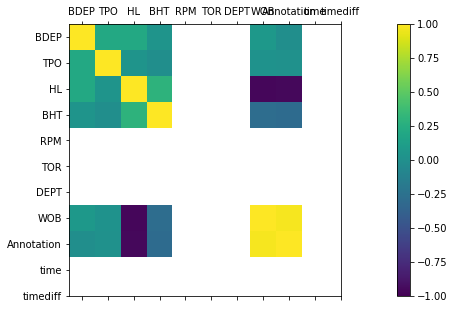

In [36]:
# visualizing variables correlation
correlations = new_df.corr()
col = new_df.columns

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(col)
ax.set_yticklabels(col)
plt.show()

RPM, TOR AND DEPT have no correlations with the others.

In [37]:
# drop NAs only from the Annotation 
new_df.dropna(subset=['Annotation'],inplace=True)

In [38]:
new_df.isna().sum()

BDEP           0
TPO           13
HL             2
BHT           15
RPM           26
TOR           17
DEPT          22
WOB           22
Annotation     0
time           0
timediff       0
dtype: int64

I will try to fill the values.TPO,RPM and TOR with 0; HL and WOB with the mean; DEPT with its constant value. 

In [39]:
df_with_nafill = new_df.copy()

In [40]:
# filling the missing values
df_with_nafill.fillna({'TPO':0,'RPM':0,'TOR':0,'HL':322.494967,'WOB':109.28,'DEPT':5795.817,'BHT':20.995},inplace=True)

In [41]:
# no missing values
df_with_nafill.isna().sum()

BDEP          0
TPO           0
HL            0
BHT           0
RPM           0
TOR           0
DEPT          0
WOB           0
Annotation    0
time          0
timediff      0
dtype: int64

In [42]:
df_with_nafill

,BDEP,TPO,HL,BHT,RPM,TOR,DEPT,WOB,Annotation,time,timediff
2020-12-05 01:14:22.361999872,5042.509,23.511311,492.985987,39.519,0.0,0.0,5795.817,42.90,0.0,2020-12-05 01:14:22.361999872,0 days 00:00:00.506999808
2020-12-05 01:14:22.880999936,5042.509,24.567999,490.615987,39.519,0.0,0.0,5795.817,45.27,0.0,2020-12-05 01:14:22.880999936,0 days 00:00:00.519000064
2020-12-05 01:14:23.388999936,5042.509,26.153032,489.895987,39.519,0.0,0.0,5795.817,45.99,0.0,2020-12-05 01:14:23.388999936,0 days 00:00:00.508000
2020-12-05 01:14:23.796000000,5042.509,14.001118,489.717987,39.519,0.0,0.0,5795.817,46.17,0.0,2020-12-05 01:14:23.796000000,0 days 00:00:00.407000064
2020-12-05 01:14:24.305999872,5042.509,22.190451,491.635987,39.519,0.0,0.0,5795.817,44.25,0.0,2020-12-05 01:14:24.305999872,0 days 00:00:00.509999872
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-05 06:50:57.604000000,3055.453,0.000000,358.541991,24.768,0.0,0.0,5795.817,2.46,0.0,2020-12-05 06:50:57.604000000,0 days 00:00:00.508000
2020-12-05 06:50:58.112000000,3055.453,0.000000,358.595991,24.856,0.0,0.0,5795.817,2.40,0.0,2020-12-05 06:50:58.112000000,0 days 00:00:00.508000
2020-12-05 06:50:58.620000000,3055.453,0.000000,358.605991,24.940,0.0,0.0,5795.817,2.39,0.0,2020-12-05 06:50:58.620000000,0 days 00:00:00.508000
2020-12-05 06:50:59.128000000,3055.281,0.000000,358.411991,25.038,0.0,0.0,5795.817,2.59,0.0,2020-12-05 06:50:59.128000000,0 days 00:00:00.508000


In [43]:
# separating the target and features. I will drop date columns
features_nafill = df_with_nafill.iloc[:,0:8]
target_nafill = df_with_nafill.iloc[:,8]

In [44]:
features_nafill

,BDEP,TPO,HL,BHT,RPM,TOR,DEPT,WOB
2020-12-05 01:14:22.361999872,5042.509,23.511311,492.985987,39.519,0.0,0.0,5795.817,42.90
2020-12-05 01:14:22.880999936,5042.509,24.567999,490.615987,39.519,0.0,0.0,5795.817,45.27
2020-12-05 01:14:23.388999936,5042.509,26.153032,489.895987,39.519,0.0,0.0,5795.817,45.99
2020-12-05 01:14:23.796000000,5042.509,14.001118,489.717987,39.519,0.0,0.0,5795.817,46.17
2020-12-05 01:14:24.305999872,5042.509,22.190451,491.635987,39.519,0.0,0.0,5795.817,44.25
...,...,...,...,...,...,...,...,...
2020-12-05 06:50:57.604000000,3055.453,0.000000,358.541991,24.768,0.0,0.0,5795.817,2.46
2020-12-05 06:50:58.112000000,3055.453,0.000000,358.595991,24.856,0.0,0.0,5795.817,2.40
2020-12-05 06:50:58.620000000,3055.453,0.000000,358.605991,24.940,0.0,0.0,5795.817,2.39
2020-12-05 06:50:59.128000000,3055.281,0.000000,358.411991,25.038,0.0,0.0,5795.817,2.59


In [45]:
target_nafill

2020-12-05 01:14:22.361999872    0.0
2020-12-05 01:14:22.880999936    0.0
2020-12-05 01:14:23.388999936    0.0
2020-12-05 01:14:23.796000000    0.0
2020-12-05 01:14:24.305999872    0.0
                                ... 
2020-12-05 06:50:57.604000000    0.0
2020-12-05 06:50:58.112000000    0.0
2020-12-05 06:50:58.620000000    0.0
2020-12-05 06:50:59.128000000    0.0
2020-12-05 06:50:59.636000000    0.0
Name: Annotation, Length: 40389, dtype: float64

In [46]:
# scaling with normalizer
from sklearn.preprocessing import Normalizer
norm = Normalizer()
features_nafill_norm = norm.fit_transform(features_nafill)

In [47]:
features_nafill_norm.shape

(40389, 8)

In [48]:
# split into train and test 65% , 35% 
from sklearn.model_selection import train_test_split
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(features_nafill_norm, target_nafill, test_size = 0.35)

Accuracy of the Random Forest on train set: 0.993
Accuracy of the Random Forest on test set: 0.992
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9653
         1.0       0.99      0.99      0.99      4484

    accuracy                           0.99     14137
   macro avg       0.99      0.99      0.99     14137
weighted avg       0.99      0.99      0.99     14137



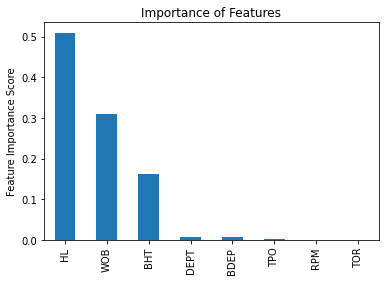

In [49]:
# I will test with gboost and random forest
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

gb_baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt')
rf_baseline = RandomForestClassifier(n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1,max_features='sqrt')


rf_baseline.fit(X_train_norm,Y_train_norm)
predictors=list(data.columns)
feat_imp = pd.Series(rf_baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the Random Forest on train set: {:.3f}'.format(rf_baseline.score(X_train_norm, Y_train_norm)))
print('Accuracy of the Random Forest on test set: {:.3f}'.format(rf_baseline.score(X_test_norm, Y_test_norm)))
pred_rf=rf_baseline.predict(X_test_norm)
print(classification_report(Y_test_norm, pred_rf))

In [50]:
rf = RandomForestClassifier()
param = {'n_estimators':[100,200],'max_depth':[3,5], 'min_samples_split':[2,4], 'min_samples_leaf':[1,3],'max_features':['sqrt']}
gs = GridSearchCV(rf,param_grid = param, scoring='accuracy')
gs.fit(X_train_norm,Y_train_norm)
pred=gs.predict(X_test_norm)
print(classification_report(Y_test_norm, pred))
gs.best_params_, gs.best_score_

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      9653
         1.0       0.99      0.99      0.99      4484

    accuracy                           0.99     14137
   macro avg       0.99      0.99      0.99     14137
weighted avg       0.99      0.99      0.99     14137



({'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.9930290502489323)

Accuracy of the GBM on train set: 0.996
Accuracy of the GBM on test set: 0.993
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      9653
         1.0       0.99      0.99      0.99      4484

    accuracy                           0.99     14137
   macro avg       0.99      0.99      0.99     14137
weighted avg       0.99      0.99      0.99     14137



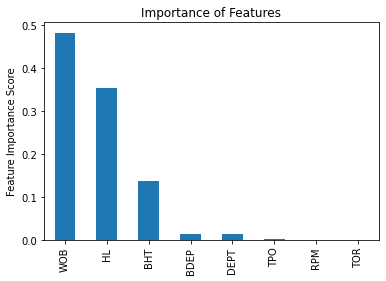

In [51]:
gb_baseline.fit(X_train_norm,Y_train_norm)
predictors=list(data.columns)
feat_imp = pd.Series(gb_baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on train set: {:.3f}'.format(gb_baseline.score(X_train_norm, Y_train_norm)))
print('Accuracy of the GBM on test set: {:.3f}'.format(gb_baseline.score(X_test_norm, Y_test_norm)))
pred_gb=gb_baseline.predict(X_test_norm)
print(classification_report(Y_test_norm, pred_gb))

The TPO, RPM and TOR had no contribution to the model.


In [52]:
# dataframe to do feature selection
X_train_norm = pd.DataFrame(X_train_norm,columns=data.columns) 
X_test_norm = pd.DataFrame(X_test_norm,columns=data.columns) 

In [53]:
# feature selection dropping DEPT,TPO,RPM and TOR.
X_train_norm_fs = X_train_norm.loc[:,['BDEP','HL','BHT','WOB']]
X_test_norm_fs = X_test_norm.loc[:,['BDEP','HL','BHT','WOB']]

In [54]:
X_train_norm_fs

,BDEP,HL,BHT,WOB
0,0.633001,0.063511,0.004087,0.000228
1,0.598351,0.060436,0.005182,0.000998
2,0.546060,0.014179,0.000630,0.043843
3,0.600591,0.060427,0.001685,0.000879
4,0.621109,0.059943,0.004123,0.002277
...,...,...,...,...
26247,0.538562,0.013093,0.000289,0.045261
26248,0.575834,0.058857,0.003256,0.001287
26249,0.520697,0.056592,0.003385,0.001035
26250,0.631643,0.062838,0.001122,0.000961


Accuracy of the GBM on train set: 0.996
Accuracy of the GBM on test set: 0.993
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      9653
         1.0       0.99      0.99      0.99      4484

    accuracy                           0.99     14137
   macro avg       0.99      0.99      0.99     14137
weighted avg       0.99      0.99      0.99     14137



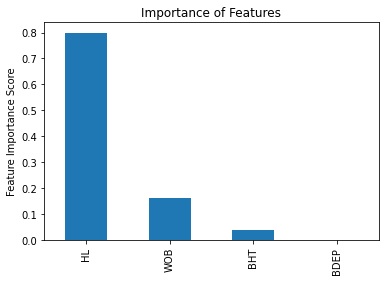

In [55]:
# model gb with feature selection
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt')
gb.fit(X_train_norm_fs,Y_train_norm)
predictors=list(X_train_norm_fs.columns)
feat_imp = pd.Series(gb.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on train set: {:.3f}'.format(gb.score(X_train_norm_fs, Y_train_norm)))
print('Accuracy of the GBM on test set: {:.3f}'.format(gb.score(X_test_norm_fs, Y_test_norm)))
pred_gbfs=gb.predict(X_test_norm_fs)
print(classification_report(Y_test_norm, pred_gbfs))

In [56]:
# scaling the data with minmaxscaler
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
features_nafill_minmax = norm.fit_transform(features_nafill)

In [57]:
X_train_minmax, X_test_minmax, Y_train_minmax, Y_test_minmax = train_test_split(features_nafill_minmax, target_nafill, test_size = 0.35)

Accuracy of the GBM with minmax on train set: 0.996
Accuracy of the GBM with minmax on test set: 0.993
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9615
         1.0       0.99      0.99      0.99      4522

    accuracy                           1.00     14137
   macro avg       0.99      0.99      0.99     14137
weighted avg       1.00      1.00      1.00     14137



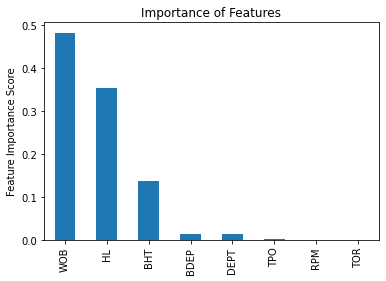

In [58]:
# testing with minmax scaled data
gb_minmax = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt')
gb_minmax.fit(X_train_minmax,Y_train_minmax)
predictors=list(data.columns)
feat_imp = pd.Series(gb_baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM with minmax on train set: {:.3f}'.format(gb_minmax.score(X_train_minmax, Y_train_minmax)))
print('Accuracy of the GBM with minmax on test set: {:.3f}'.format(gb_minmax.score(X_test_minmax, Y_test_minmax)))
pred_minmax=gb_baseline.predict(X_test_minmax)
print(classification_report(Y_test_minmax, pred_minmax))

Almost the same result as normalized the data.
I will try to drop missing values and see what happen.

In [59]:
df_nadropped = new_df.copy()

In [60]:
df_nadropped.dropna(axis=0,inplace=True)

In [61]:
df_nadropped.isna().sum()

BDEP          0
TPO           0
HL            0
BHT           0
RPM           0
TOR           0
DEPT          0
WOB           0
Annotation    0
time          0
timediff      0
dtype: int64

In [62]:
df_nadropped[df_nadropped['Annotation']==0.0]

,BDEP,TPO,HL,BHT,RPM,TOR,DEPT,WOB,Annotation,time,timediff
2020-12-05 01:14:22.361999872,5042.509,23.511311,492.985987,39.519,0.0,0.0,5795.817,42.90,0.0,2020-12-05 01:14:22.361999872,0 days 00:00:00.506999808
2020-12-05 01:14:22.880999936,5042.509,24.567999,490.615987,39.519,0.0,0.0,5795.817,45.27,0.0,2020-12-05 01:14:22.880999936,0 days 00:00:00.519000064
2020-12-05 01:14:23.388999936,5042.509,26.153032,489.895987,39.519,0.0,0.0,5795.817,45.99,0.0,2020-12-05 01:14:23.388999936,0 days 00:00:00.508000
2020-12-05 01:14:23.796000000,5042.509,14.001118,489.717987,39.519,0.0,0.0,5795.817,46.17,0.0,2020-12-05 01:14:23.796000000,0 days 00:00:00.407000064
2020-12-05 01:14:24.305999872,5042.509,22.190451,491.635987,39.519,0.0,0.0,5795.817,44.25,0.0,2020-12-05 01:14:24.305999872,0 days 00:00:00.509999872
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-05 06:50:57.604000000,3055.453,0.000000,358.541991,24.768,0.0,0.0,5795.817,2.46,0.0,2020-12-05 06:50:57.604000000,0 days 00:00:00.508000
2020-12-05 06:50:58.112000000,3055.453,0.000000,358.595991,24.856,0.0,0.0,5795.817,2.40,0.0,2020-12-05 06:50:58.112000000,0 days 00:00:00.508000
2020-12-05 06:50:58.620000000,3055.453,0.000000,358.605991,24.940,0.0,0.0,5795.817,2.39,0.0,2020-12-05 06:50:58.620000000,0 days 00:00:00.508000
2020-12-05 06:50:59.128000000,3055.281,0.000000,358.411991,25.038,0.0,0.0,5795.817,2.59,0.0,2020-12-05 06:50:59.128000000,0 days 00:00:00.508000


In [63]:
features_nadrop = df_nadropped.iloc[:,0:8]
target_nadrop = df_nadropped.iloc[:,8]

In [64]:
features_nadrop_norm = norm.fit_transform(features_nadrop)

In [65]:
X_train_norm_drop, X_test_norm_drop, Y_train_norm_drop, Y_test_norm_drop = train_test_split(features_nadrop_norm, target_nadrop, test_size = 0.35)

Accuracy of the GBM with dropped and normalized data on train set: 0.996
Accuracy of the GBM with dropped and normalized data on test set: 0.994
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9602
         1.0       0.99      0.99      0.99      4526

    accuracy                           0.99     14128
   macro avg       0.99      0.99      0.99     14128
weighted avg       0.99      0.99      0.99     14128



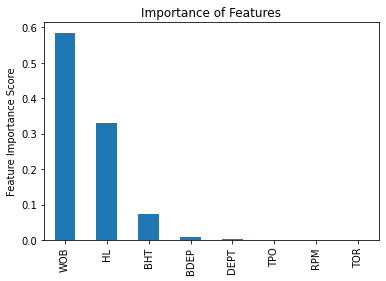

In [66]:
gb_norm_drop = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt')
gb_norm_drop.fit(X_train_norm_drop,Y_train_norm_drop)
predictors=list(data.columns)
feat_imp = pd.Series(gb_norm_drop.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM with dropped and normalized data on train set: {:.3f}'.format(gb_norm_drop.score(X_train_norm_drop, Y_train_norm_drop)))
print('Accuracy of the GBM with dropped and normalized data on test set: {:.3f}'.format(gb_norm_drop.score(X_test_norm_drop, Y_test_norm_drop)))
pred_norm_drop=gb_norm_drop.predict(X_test_norm_drop)
print(classification_report(Y_test_norm_drop, pred_norm_drop))

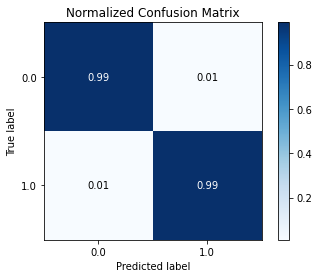

In [67]:
from scikitplot.metrics import plot_confusion_matrix
plot_confusion_matrix(Y_test_norm, pred_gbfs,normalize=True)
plt.show()

The variables TPO,RPM and TOR had no correlations with the other variables.
Also they had no contributions to the models I had built so far. Thus, I will build a final model without this variables.
Moreover, I will split the dataset into train,validation and test data to guarantee that the model can generalize.

In [68]:
# selecting the variables for final model
df = pd.DataFrame(features_nafill_norm,columns=data.columns)
df = df.loc[:,['BDEP','HL','BHT','DEPT','WOB']]

In [69]:
# splitting into train, validation and test
train, test, y_train, y_test = train_test_split(df,target_nafill,test_size=0.2,train_size=0.8)
train, validate, y_train, y_validate = train_test_split(train,y_train,test_size = 0.25,train_size =0.75)

In [70]:
train.shape

(24233, 5)

In [71]:
validate.shape

(8078, 5)

In [72]:
test.shape

(8078, 5)

In [73]:
y_train.shape

(24233,)

In [74]:
y_validate.shape

(8078,)

In [75]:
y_test.shape

(8078,)

Accuracy of the GBM on train set: 0.996
Accuracy of the GBM on validation set: 0.993
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      5499
         1.0       0.99      0.99      0.99      2579

    accuracy                           0.99      8078
   macro avg       0.99      0.99      0.99      8078
weighted avg       0.99      0.99      0.99      8078

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5535
         1.0       0.99      0.99      0.99      2543

    accuracy                           0.99      8078
   macro avg       0.99      0.99      0.99      8078
weighted avg       0.99      0.99      0.99      8078



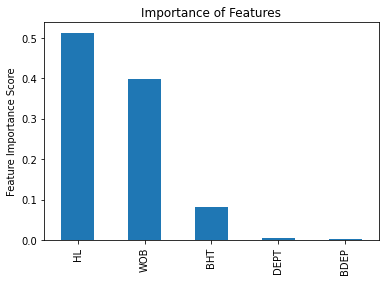

In [76]:
# final model
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt')
model.fit(train,y_train)
predictors=list(df.columns)
feat_imp_model = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)
feat_imp_model.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on train set: {:.3f}'.format(model.score(train, y_train)))
print('Accuracy of the GBM on validation set: {:.3f}'.format(model.score(validate, y_validate)))
prediction_valid = model.predict(validate)
print(classification_report(y_validate, prediction_valid))
prediction_test = model.predict(test)
print(classification_report(y_test, prediction_test))

In [77]:
# saving the model
from joblib import dump, load

filename = 'model.joblib'
dump(model, open(filename,'wb'))

In [78]:
from sklearn.pipeline import Pipeline

user_input = np.array([5042.509,492.985987,39.519,5795.817,42.90]).reshape(1,5)

loaded_model = load(open(filename,'rb'))

pipe = Pipeline([('scaler', Normalizer()), ('model', loaded_model)])

predction = pipe.predict(user_input)

if predction == 0:
    print('off_slips')
elif predction == 1:
    print('on_slips')
    
    
predction

off_slips


array([0.])